# Crime Analysis in Los Angeles

![Los Angeles skyline](la_skyline.jpg)

## Introduction

Los Angeles, California 😎 - The City of Angels, Tinseltown, and the Entertainment Capital of the World! Known for its warm weather, palm trees, sprawling coastline, and Hollywood, Los Angeles is a bustling metropolis. However, like any highly populated city, it faces its share of challenges, including crime. You have been tasked with assisting the Los Angeles Police Department (LAPD) in analyzing crime data to identify patterns in criminal behavior. These insights will help the LAPD allocate resources effectively to tackle various crimes in different areas.

## The Data

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

Let's dive into the analysis to uncover some patterns and insights from this data.

## Importing Libraries

In [10]:
# First, we import the necessary libraries for data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Next, we load the dataset and display its first few rows to understand its structure.
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Analyzing Crime Frequency by Hour of Day
To understand when crimes are most frequently committed, we extract the hour from the `TIME OCC` column and visualize the frequency of crimes for each hour of the day.

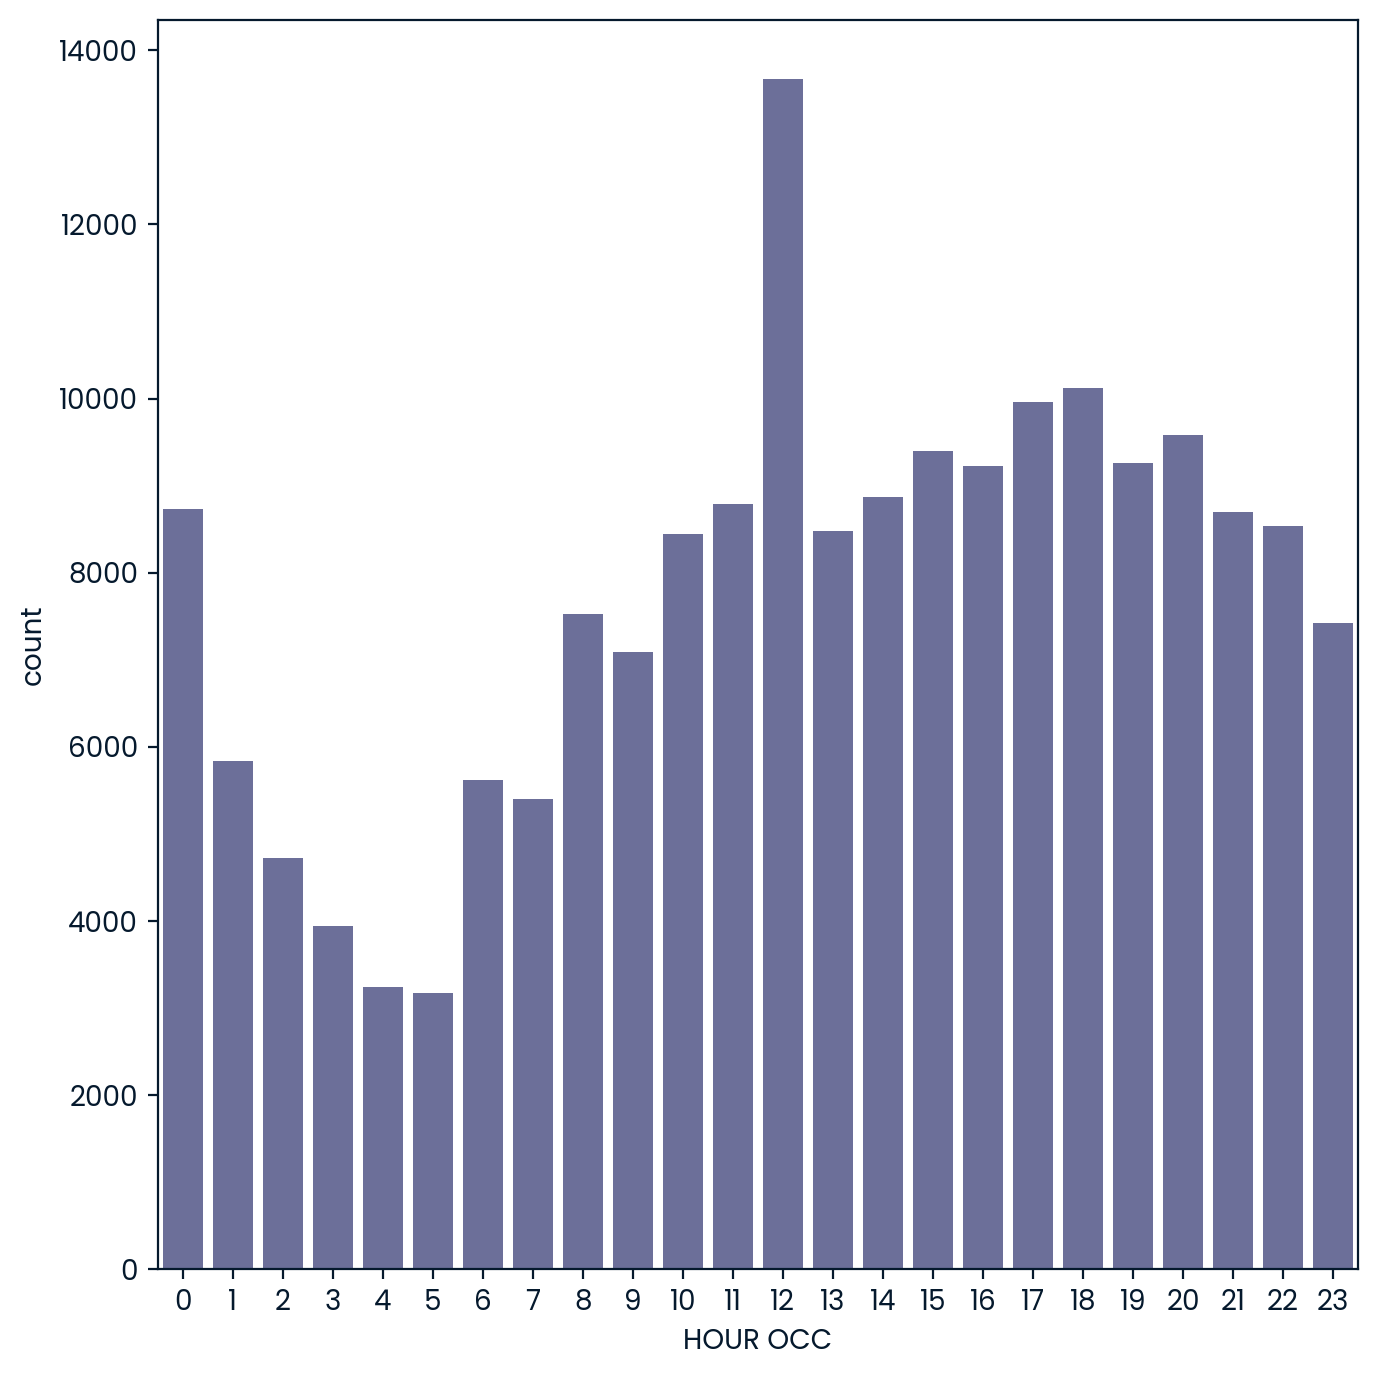

In [11]:
# Extract the hour from the `TIME OCC` column as int type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Visualize the frequency of crimes by hour of the day
plt.figure(figsize=(7, 7))
sns.countplot(data=crimes, x="HOUR OCC")
plt.tight_layout()
plt.show()

# From this visualization, we can identify the peak crime hour.

# Assign the max frequency to the `peak_crime_hour` variable
peak_crime_hour = 12

## Analyzing Night Crimes by Location
Next, we focus on crimes committed at night (between 22:00 and 03:59). We subset the data for these hours and visualize the frequency of night crimes by location.

From this analysis, we determine the area with the highest frequency of night crimes.

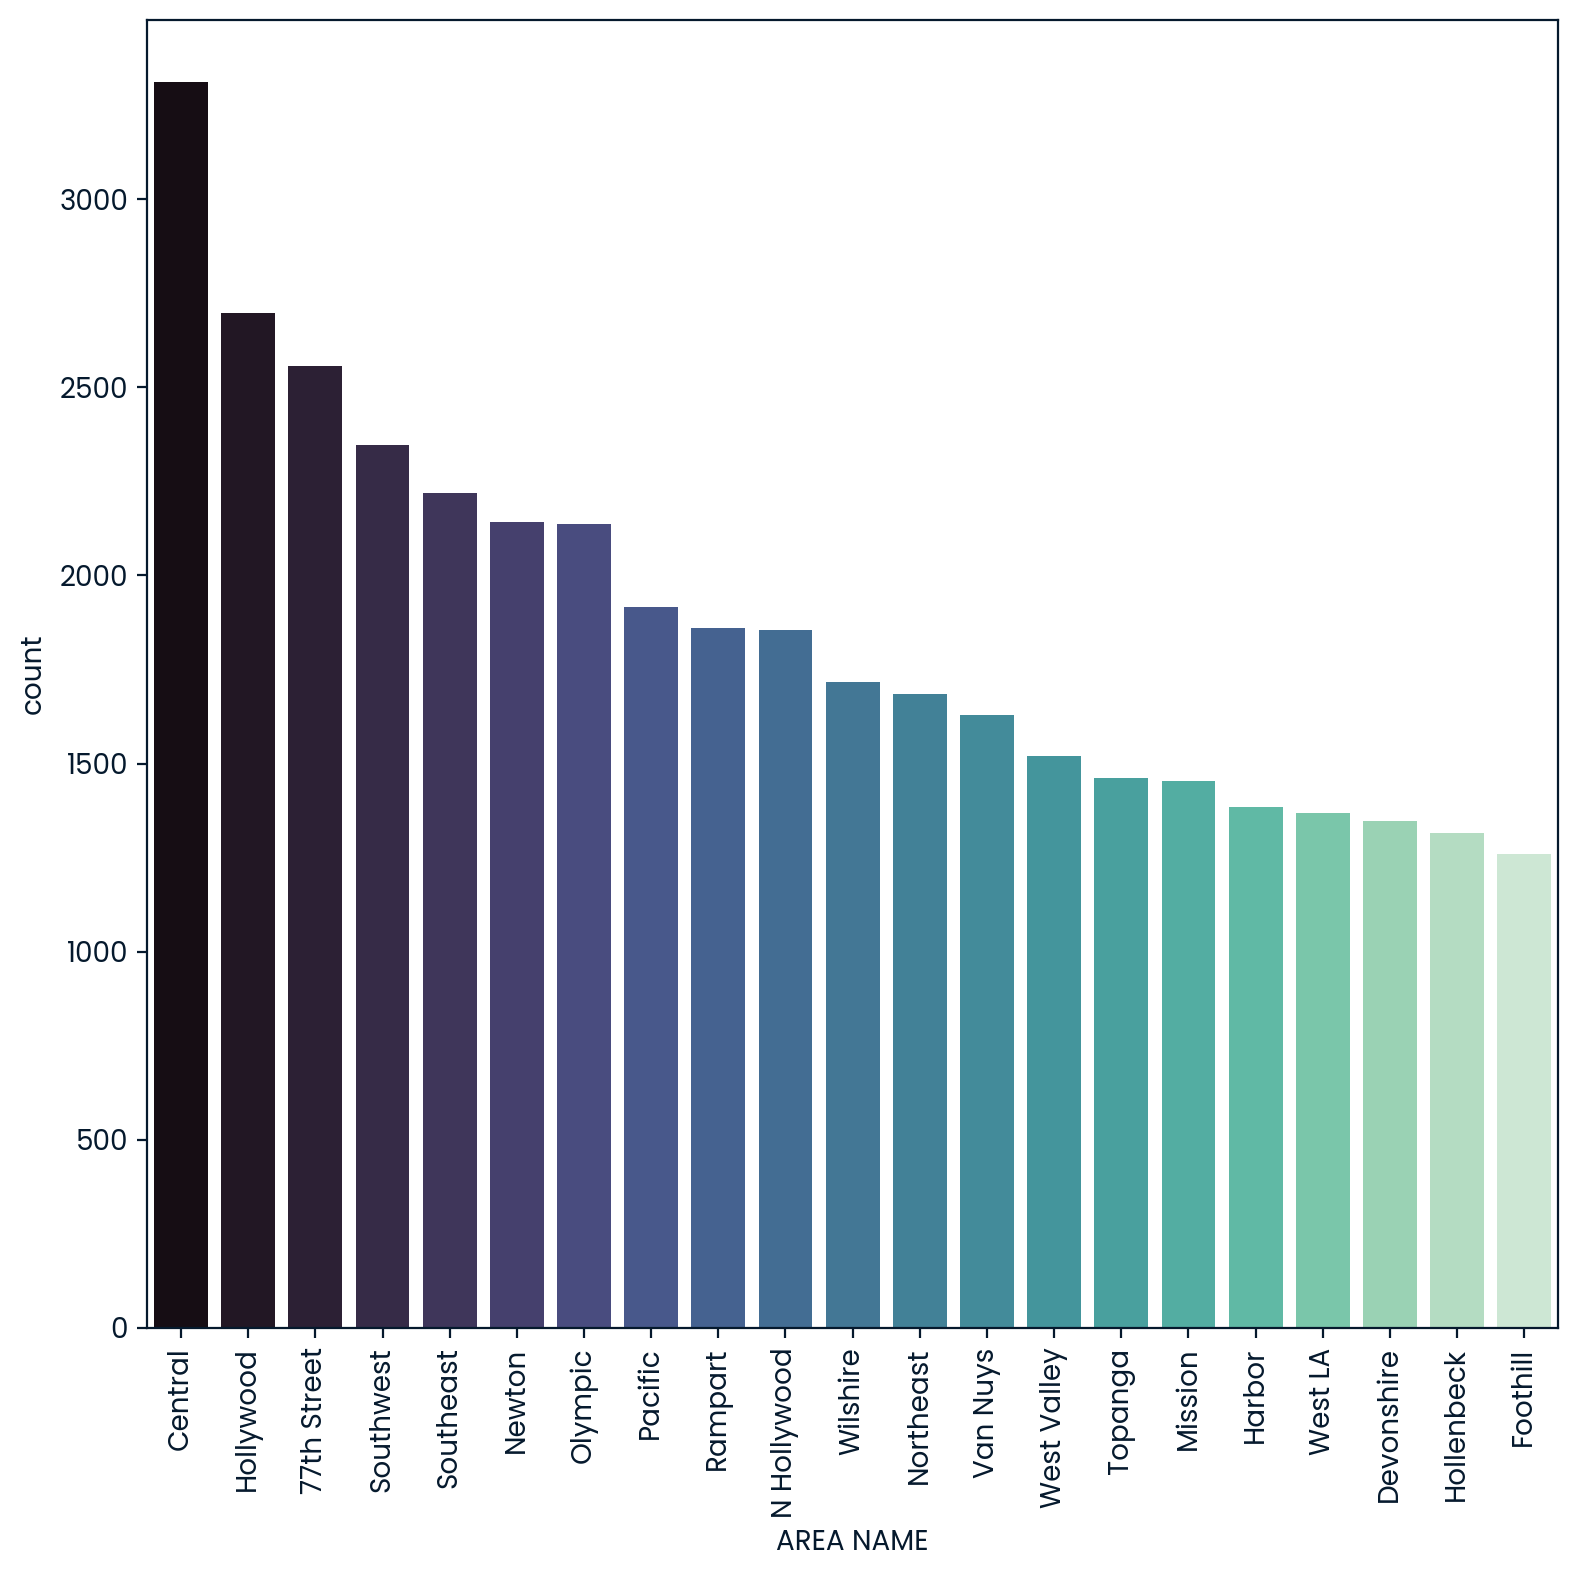

In [12]:
# Subset the `crimes` df for crimes committed at night 
night_crimes = crimes[(crimes["TIME OCC"].astype(int) <= 359) | (crimes["HOUR OCC"].astype(int) >= 2200)]

# Visualize the frequency of night crimes by location
plt.figure(figsize=(8, 8))
sns.countplot(data=night_crimes, x="AREA NAME", palette="mako", order=night_crimes["AREA NAME"].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Assign the max frequency to the `peak_night_crime_location` variable
peak_night_crime_location = 'Central'

## Analyzing Victim Age Distribution
We categorize crime victims into age bins and visualize the distribution of crime victims across different age groups.

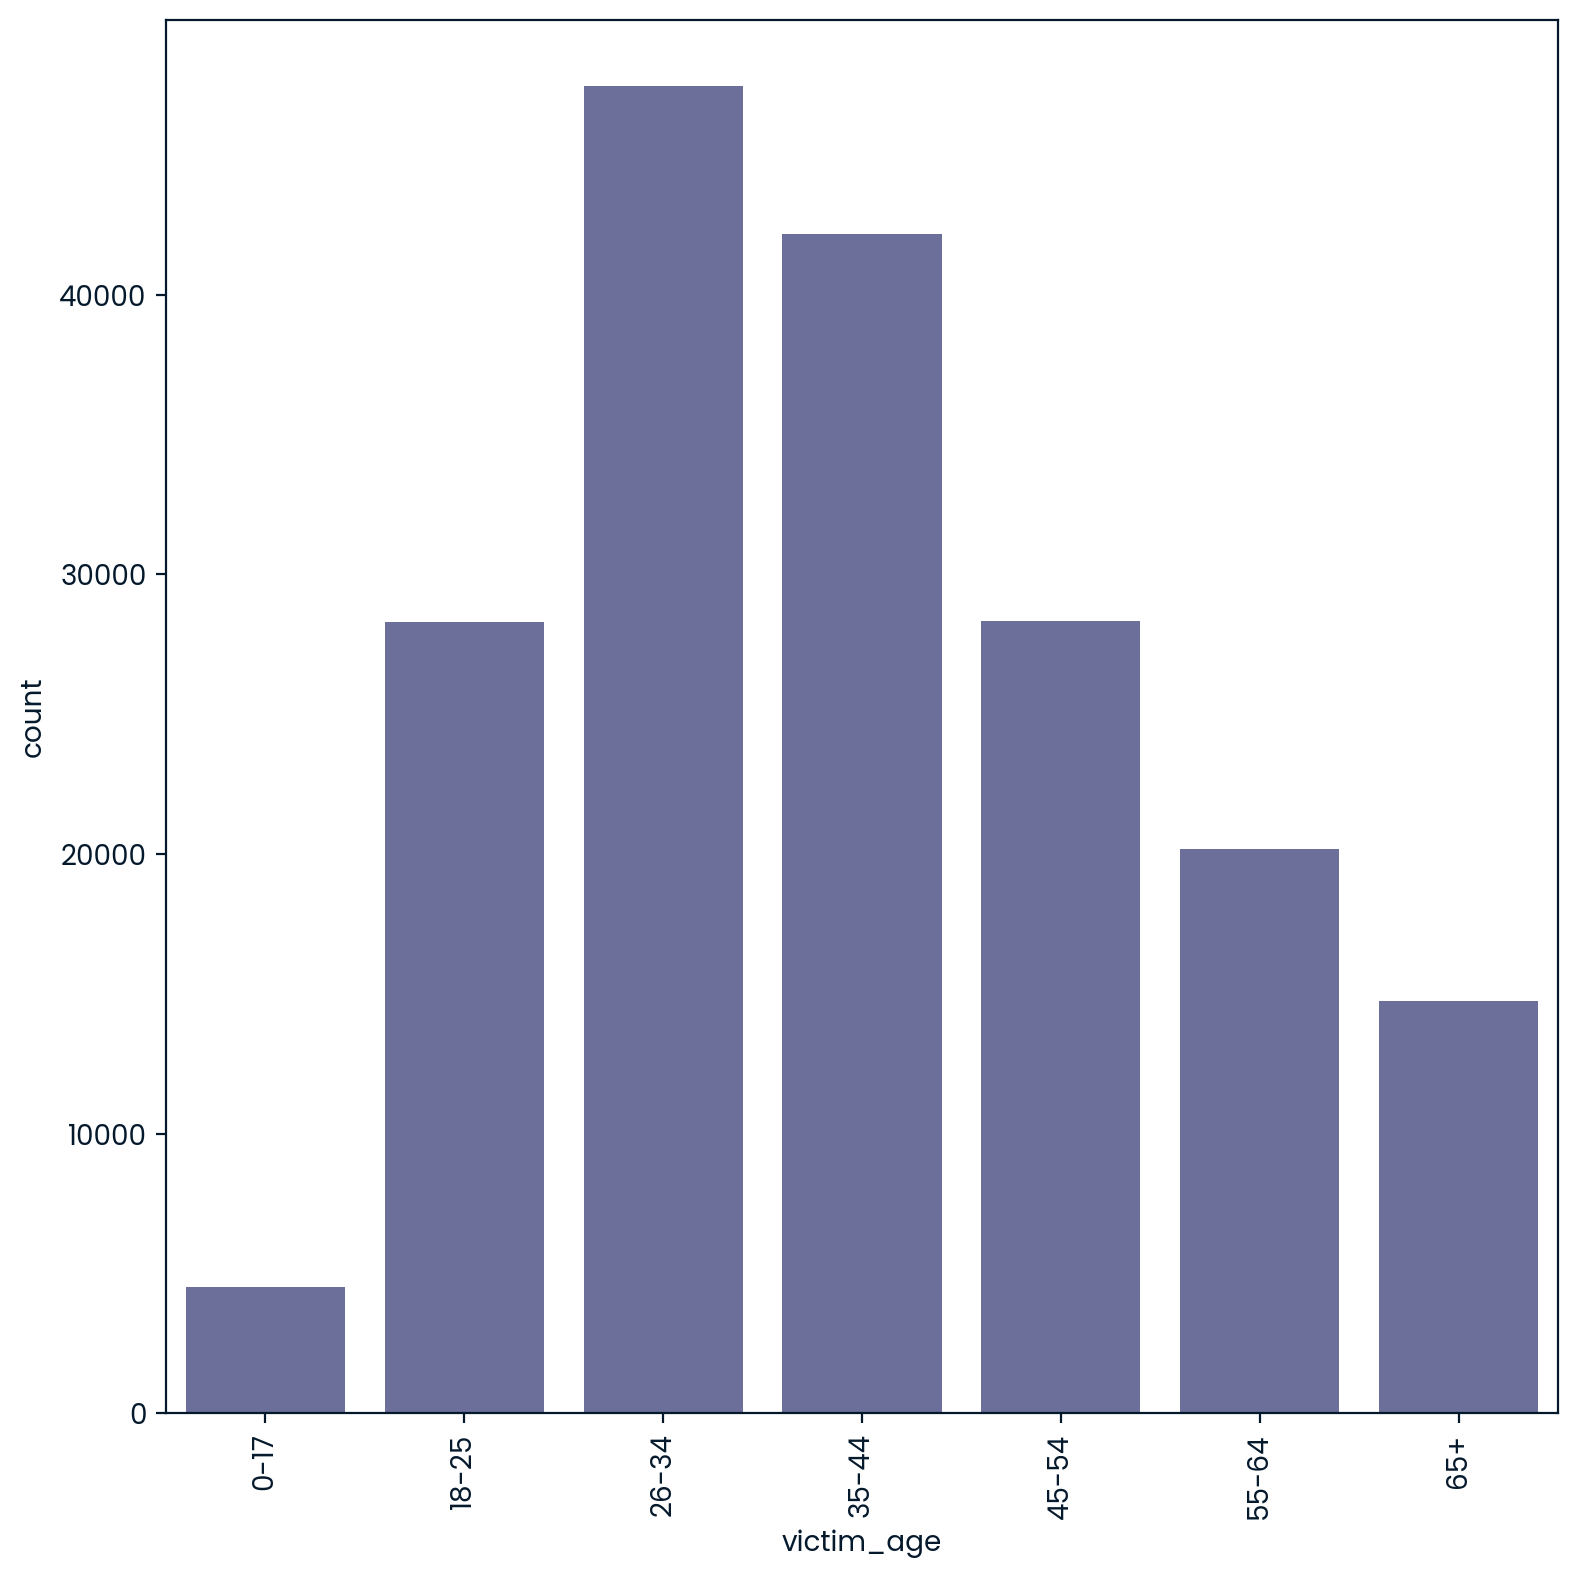

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: victim_age, dtype: int64


In [13]:
# Assign the crime victims to age bins
bins = [0, 17, 25, 34, 44, 54, 64, crimes["Vict Age"].max()]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["victim_age"] = pd.cut(crimes["Vict Age"], bins, labels=labels)

# Visualize the frequency of crime against victims' age
plt.figure(figsize=(8, 8))
sns.countplot(data=crimes, x="victim_age")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# We also print the counts for each age group.

victim_ages = crimes["victim_age"].value_counts()
print(victim_ages)

# Conclusion

Through this analysis, we have identified key patterns in the crime data:
- The peak hour for crimes is 12:00.
- The Central area experiences the highest number of night crimes.
- Individuals aged 26-34 are the most frequent victims of crime.

These insights can help the LAPD allocate resources more effectively to address crime in Los Angeles.

